<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [6]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [7]:
#Missing value
missing_data = df.isnull()
print('\nValue counts for missing data in Employment column:\n')
print( missing_data['Employment'].value_counts())

print('\nValue counts for missing data in JobSat column:\n')
print( missing_data['JobSat'].value_counts())

print('\nValue counts for missing data in RemoteWork column:\n')
print( missing_data['RemoteWork'].value_counts())


Value counts for missing data in Employment column:

Employment
False    65437
Name: count, dtype: int64

Value counts for missing data in JobSat column:

JobSat
True     36311
False    29126
Name: count, dtype: int64

Value counts for missing data in RemoteWork column:

RemoteWork
False    54806
True     10631
Name: count, dtype: int64


In [8]:
#check the unique value
print('There are', df['JobSat'].nunique(), 'unique JobSat Level in the survey:')
print(df['JobSat'].value_counts())

print('\nThere are', df['RemoteWork'].nunique(), 'unique Remote Work values in the survey:')
print(df['RemoteWork'].value_counts())

There are 11 unique JobSat Level in the survey:
JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

There are 3 unique Remote Work values in the survey:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


In [9]:
df.info('JobSat')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [12]:
import numpy as np

#Impute (replace) all the empty rows in the column JobSat with the majority value
df['JobSat'].replace(np.nan, 8.0, inplace=True)

/tmp/ipykernel_803/3916674805.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].replace(np.nan, 8.0, inplace=True)


In [13]:
#check after replacement missing_data = df.isnull()
missing_data_jobsatnew = df.isnull()
print('\nValue counts for missing data in JobSat column:\n')
print( missing_data_jobsatnew['JobSat'].value_counts())


Value counts for missing data in JobSat column:

JobSat
False    65437
Name: count, dtype: int64


In [14]:
#Impute (replace) all the empty rows in the column RemoteWork with the majority value
df['RemoteWork'].replace(np.nan, "Hybrid (some remote, some in-person)", inplace=True)

/tmp/ipykernel_803/2099759376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].replace(np.nan, "Hybrid (some remote, some in-person)", inplace=True)


In [15]:
#check after replacement missing_data = df.isnull()
missing_data_remoteworknew = df.isnull()
print('\nValue counts for missing data in RemoteWork column:\n')
print( missing_data_remoteworknew['RemoteWork'].value_counts())


Value counts for missing data in RemoteWork column:

RemoteWork
False    65437
Name: count, dtype: int64


In [16]:
#check the unique value after impute
print('There are', df['JobSat'].nunique(), 'unique JobSat Level in the survey:')
print(df['JobSat'].value_counts())

print('\nThere are', df['RemoteWork'].nunique(), 'unique Remote Work values in the survey:')
print(df['RemoteWork'].value_counts())

There are 11 unique JobSat Level in the survey:
JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

There are 3 unique Remote Work values in the survey:
RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [17]:
#Missing Value
print('\nValue counts for missing data in YearsCodePro column:\n')
print( missing_data['YearsCodePro'].value_counts())

print('\nValue counts for missing data in JobSat column:\n')
print( missing_data_jobsatnew['JobSat'].value_counts())


Value counts for missing data in YearsCodePro column:

YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

Value counts for missing data in JobSat column:

JobSat
False    65437
Name: count, dtype: int64


In [18]:
#check the unique value
print('\nThere are', df['YearsCodePro'].nunique(), 'unique YearsCodePro values in the survey:')
print(df['YearsCodePro'].value_counts())

print('\nThere are', df['JobSat'].nunique(), 'unique JobSat values in the survey:')
print(df['JobSat'].value_counts())


There are 52 unique YearsCodePro values in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34           

In [19]:
#Impute (replace) all the empty rows in the column YearsCodePro with the majority value
df['YearsCodePro'].replace(np.nan, "2", inplace=True)

/tmp/ipykernel_803/3301848889.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace(np.nan, "2", inplace=True)


In [20]:
#Check after replacement
missing_data_yearscodepronew = df.isnull()
print('\nValue counts for missing data in YearsCodePro column:\n')
print( missing_data_yearscodepronew['YearsCodePro'].value_counts())


Value counts for missing data in YearsCodePro column:

YearsCodePro
False    65437
Name: count, dtype: int64


In [21]:
#replace Less than 1 year with 0 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '55'})

In [22]:
#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2     17995
3      4093
5      3526
10     3251
4      3215
0      2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [23]:
# Convert 'YearsCodePro' to integer
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df.info('YearsCodePro')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    int64  
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [24]:
#build a bin array
bins =[0, 5, 10, 20, 100]

#setup group name
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

#apply the function "cut" to determine what each value of df['YearsCodePro'] belongs to
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

#calculate median JobSat for each range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)

#print the summary
print("Median Job Satisfaction by Professional Coding Experience Range:")
print(median_satisfaction)

Median Job Satisfaction by Professional Coding Experience Range:
ExperienceRange
0-5 years      8.0
5-10 years     8.0
10-20 years    8.0
>20 years      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_803/556709097.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


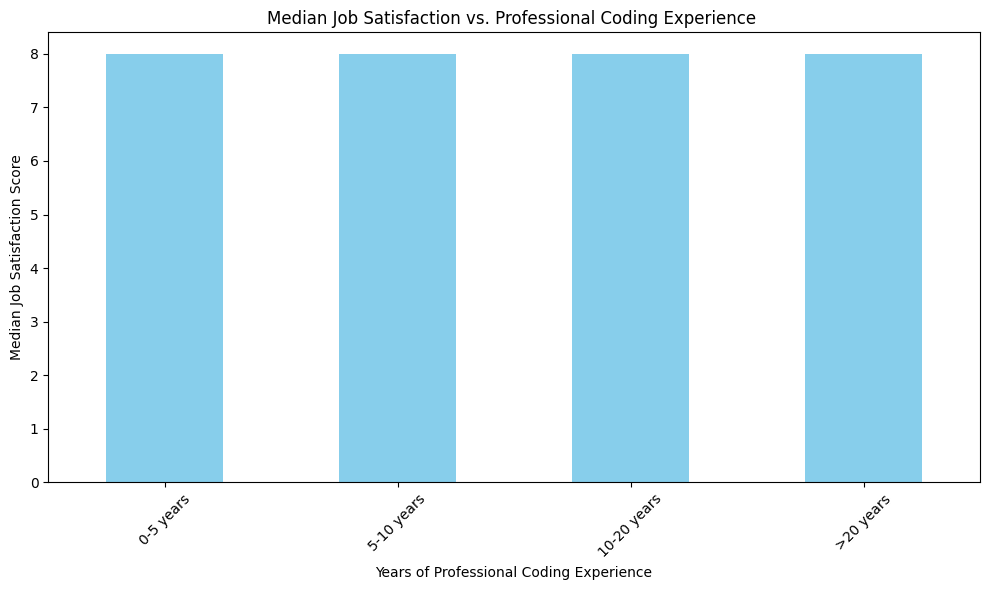

In [25]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction vs. Professional Coding Experience ')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [26]:
print('\nValue counts for missing data in Employment column:\n')
print( missing_data['Employment'].value_counts())

print('\nValue counts for missing data in RemoteWork column:\n')
print( missing_data_remoteworknew['RemoteWork'].value_counts())


Value counts for missing data in Employment column:

Employment
False    65437
Name: count, dtype: int64

Value counts for missing data in RemoteWork column:

RemoteWork
False    65437
Name: count, dtype: int64


In [27]:
#check the unique value
print('\nThere are', df['Employment'].nunique(), 'unique Employment values in the survey:')
print(df['Employment'].value_counts())

print('\nThere are', df['RemoteWork'].nunique(), 'unique RemoteWork values in the survey:')
print(df['RemoteWork'].value_counts())


There are 110 unique Employment values in the survey:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ... 

/tmp/ipykernel_803/609053643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='viridis')


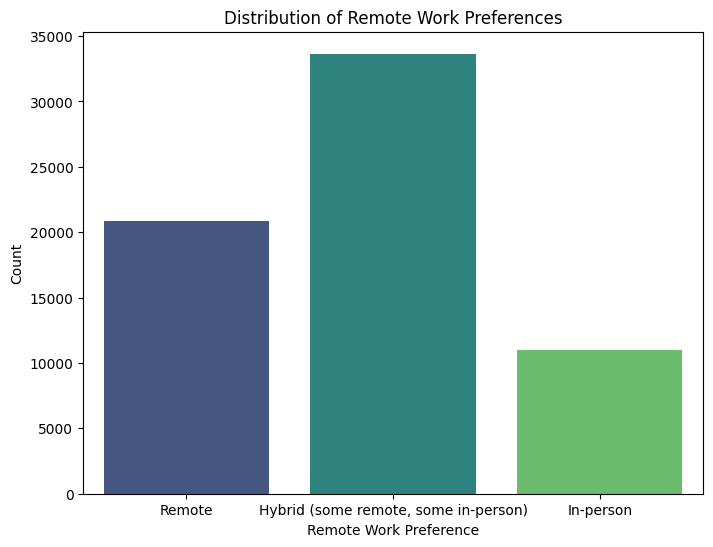

Cross-tabulation: Remote Work Preference by Employment Type
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time  

In [28]:
# 1. Count plot of Remote Work Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', palette='viridis')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

# 2. Cross-tabulation of Remote Work Preferences by Employment Type
print("Cross-tabulation: Remote Work Preference by Employment Type")
cross_tab_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print(cross_tab_employment)
print("\n")

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [103]:
#check missing value
print('\nValue counts for missing data in LanguageHaveWorkedWith column:\n')
print( missing_data['LanguageHaveWorkedWith'].value_counts())

print('\nValue counts for missing data in Country column:\n')
print( missing_data['Country'].value_counts())


Value counts for missing data in LanguageHaveWorkedWith column:

LanguageHaveWorkedWith
False    59745
True      5692
Name: count, dtype: int64

Value counts for missing data in Country column:

Country
False    58930
True      6507
Name: count, dtype: int64


In [52]:
#check the unique value
print('\nThere are', df['LanguageHaveWorkedWith'].nunique(), 'unique LanguageHaveWorkedWith values in the survey:')
print(df['LanguageHaveWorkedWith'].value_counts())

print('\nThere are', df['Country'].nunique(), 'unique Country values in the survey:')
print(df['Country'].value_counts())


There are 23864 unique LanguageHaveWorkedWith values in the survey:
LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                    1002
Python                                                                             832
HTML/CSS;JavaScript;PHP;SQL                                                        503
C#                                                                                 452
HTML/CSS;JavaScript                                                                452
                                                                                  ... 
Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript                         1
C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript                                     1
C;HTML/CSS;JavaScript;MATLAB;PHP;Python;TypeScript                                   1
C;Dart;Delphi;Java;Kotlin;Objective-C;PHP;SQL                                        1
Bash/Shell (all shells);C;C#;C++;Go;HT

In [104]:
#Impute (replace) all the empty rows in the column with the majority value
df['Country'].replace(np.nan, "United States of America", inplace=True)
df['LanguageHaveWorkedWith'].replace(np.nan, "HTML/CSS;JavaScript;TypeScript", inplace=True)

/tmp/ipykernel_301/1177335668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace(np.nan, "United States of America", inplace=True)
/tmp/ipykernel_301/1177335668.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [105]:
#check missing value
missing_data_language = df.isnull()
print('\nValue counts for missing data in LanguageHaveWorkedWith column:\n')
print( missing_data_language['LanguageHaveWorkedWith'].value_counts())



Value counts for missing data in LanguageHaveWorkedWith column:

LanguageHaveWorkedWith
False    65437
Name: count, dtype: int64


In [106]:
missing_data_country = df.isnull()
print('\nValue counts for missing data in Country column:\n')
print( missing_data_country['Country'].value_counts())


Value counts for missing data in Country column:

Country
False    65437
Name: count, dtype: int64


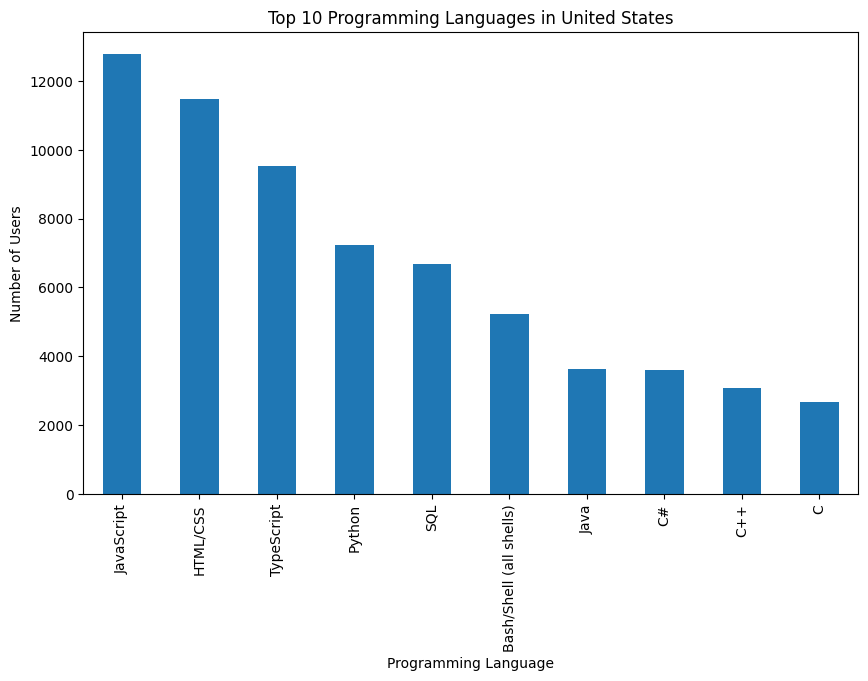

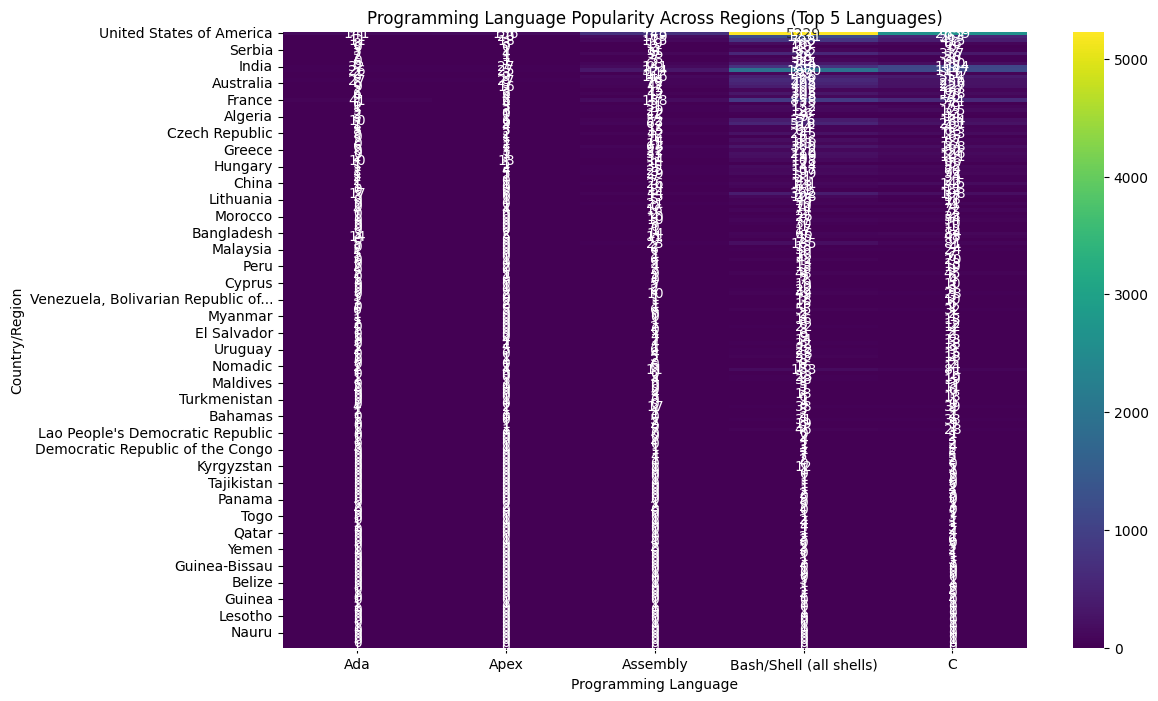

In [107]:
#Process languages and count them per country
language_counts_by_country = {}
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    all_languages = []
    for languages_str in country_df['LanguageHaveWorkedWith'].dropna():
        # Assuming languages are comma-separated
        all_languages.extend([lang.strip() for lang in languages_str.split(';')])
    
    # Count language occurrences
    language_counts = pd.Series(all_languages).value_counts()
    language_counts_by_country[country] = language_counts

#convert to a DataFrame for easier plotting
language_popularity_df = pd.DataFrame(language_counts_by_country).fillna(0)

#visualize top languages in a specific country (e.g., United States)
if 'United States of America' in language_popularity_df.columns:
    plt.figure(figsize=(10, 6))
    language_popularity_df['United States of America'].nlargest(10).plot(kind='bar')
    plt.title('Top 10 Programming Languages in United States')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Users')
    plt.show()

#visualize popularity across regions using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(language_popularity_df.head(5).T, cmap='viridis', annot=True, fmt=".0f") # Top 5 languages for heatmap
plt.title('Programming Language Popularity Across Regions (Top 5 Languages)')
plt.xlabel('Programming Language')
plt.ylabel('Country/Region')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [108]:
#check missing value
missing_data = df.isnull()
print('\nValue counts for missing data in JobSatPoints_1 column:\n')
print( missing_data['JobSatPoints_1'].value_counts())


Value counts for missing data in JobSatPoints_1 column:

JobSatPoints_1
True     36113
False    29324
Name: count, dtype: int64


In [109]:
#check unique value
print('\nThere are', df['JobSatPoints_1'].nunique(), 'unique JobSatPoints_1 values in the survey:')
print(df['JobSatPoints_1'].value_counts())


There are 91 unique JobSatPoints_1 values in the survey:
JobSatPoints_1
0.0     11271
10.0     4010
20.0     2909
5.0      1496
30.0     1309
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 91, dtype: int64


In [110]:
#calculate the mean value for the "JobSatPoints_1" column
avg_jobsat1 = df["JobSatPoints_1"].astype("float").mean(axis=0)
print("Average of JobSatPoints_1:", avg_jobsat1)

Average of JobSatPoints_1: 18.5810939844496


In [111]:
#replace the missing 'JobSatPoints_1' values by the mean value
df["JobSatPoints_1"].replace(np.nan, avg_jobsat1, inplace=True)

/tmp/ipykernel_301/1890468843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["JobSatPoints_1"].replace(np.nan, avg_jobsat1, inplace=True)


In [112]:
#check missing value
missing_data_jobsat1 = df.isnull()
print('\nValue counts for missing data in JobSatPoints_1 column:\n')
print( missing_data_jobsat1['JobSatPoints_1'].value_counts())


Value counts for missing data in JobSatPoints_1 column:

JobSatPoints_1
False    65437
Name: count, dtype: int64


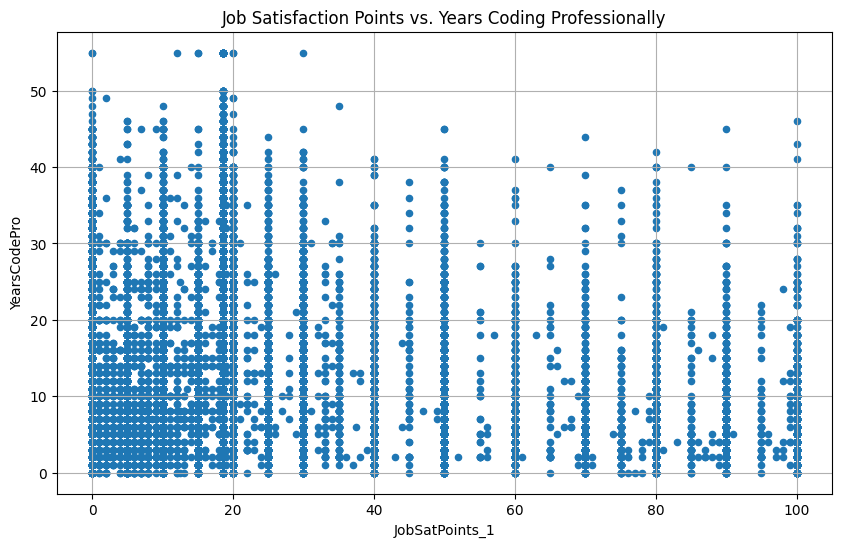

In [115]:
plt.figure(figsize=(10, 6))
df.plot.scatter(x='JobSatPoints_1', y='YearsCodePro', ax=plt.gca()) 
plt.title('Job Satisfaction Points vs. Years Coding Professionally')
plt.xlabel('JobSatPoints_1')
plt.ylabel('YearsCodePro')
plt.grid(True)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [116]:
#check missing value
missing_data= df.isnull()
print('\nValue counts for missing data in EdLevel column:\n')
print( missing_data['EdLevel'].value_counts())


Value counts for missing data in EdLevel column:

EdLevel
False    60784
True      4653
Name: count, dtype: int64


In [117]:
#check unique value
print('\nThere are', df['EdLevel'].nunique(), 'unique EdLevel values in the survey:')
print(df['EdLevel'].value_counts())


There are 8 unique EdLevel values in the survey:
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


In [118]:
#Impute (replace) all the empty rows in the column with the majority value
df['EdLevel'].replace(np.nan, "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", inplace=True)

/tmp/ipykernel_301/582425524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].replace(np.nan, "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", inplace=True)


In [119]:
#check missing value
missing_data_edlevel= df.isnull()
print('\nValue counts for missing data in EdLevel column:\n')
print( missing_data_edlevel['EdLevel'].value_counts())


Value counts for missing data in EdLevel column:

EdLevel
False    65437
Name: count, dtype: int64


In [120]:
#check unique value
print('\nThere are', df['EdLevel'].nunique(), 'unique EdLevel values in the survey:')
print(df['EdLevel'].value_counts())


There are 8 unique EdLevel values in the survey:
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29595
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


In [122]:
#cross-tabulation of Education by Employment Type
print("Cross-tabulation: Education by Employment Type")
cross_tab_employment = pd.crosstab(df['Employment'], df['EdLevel'])
print(cross_tab_employment)
print("\n")

Cross-tabulation: Education by Employment Type
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                         

<Figure size 1000x600 with 0 Axes>

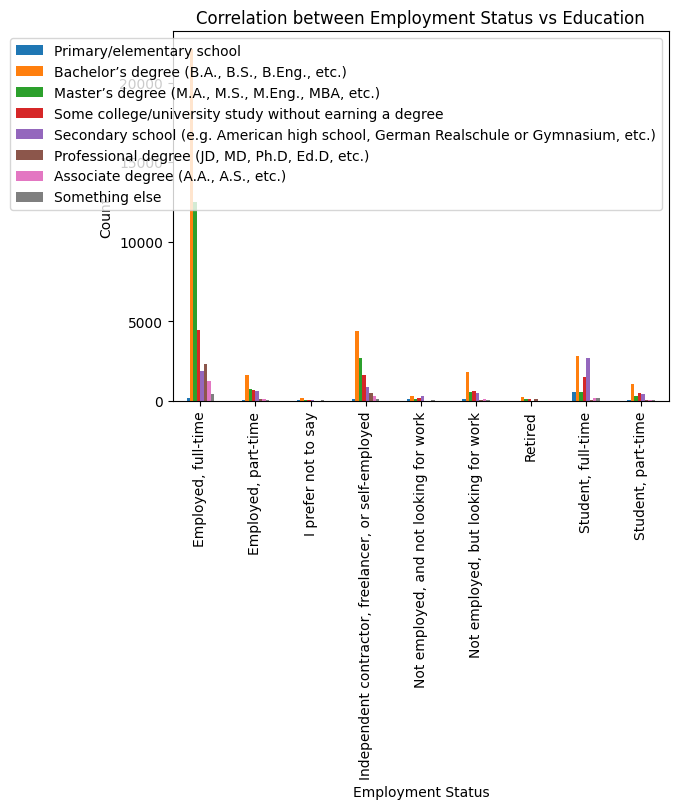

In [125]:
#Process employment and count them per education level
employment_counts_by_education = {}
for education in df['EdLevel'].unique():
    education_df = df[df['EdLevel'] == education]
    all_employment = []
    for employment_str in education_df['Employment'].dropna():
        # Assuming employment are comma-separated
        all_employment.extend([emp.strip() for emp in employment_str.split(';')])
    
    # Count employment occurrences
    employment_counts = pd.Series(all_employment).value_counts()
    employment_counts_by_education[education] = employment_counts

#convert to a DataFrame for easier plotting
education_popularity_df = pd.DataFrame(employment_counts_by_education).fillna(0)

#visualize
plt.figure(figsize=(10, 6))
education_popularity_df.plot(kind='bar')
plt.title('Correlation between Employment Status vs Education')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [127]:
df.to_csv('modified_dataset.csv', index=False)
print("Modified dataset saved to 'modified_dataset.csv'")

Modified dataset saved to 'modified_dataset.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
